<h1>Beginner Level Task</h1>
<h2>Task 3: Music Recommendation</h2>

<b>Name: Sumant Pujari</b>

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for data optimization
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

# for building model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Load Dataset from Drive
train = pd.read_csv('/content/drive/MyDrive/Data_Science/Datasets/MusicRecommedation/train.csv')
songs = pd.read_csv('/content/drive/MyDrive/Data_Science/Datasets/MusicRecommedation/songs.csv')
members = pd.read_csv('/content/drive/MyDrive/Data_Science/Datasets/MusicRecommedation/members.csv')

# Data Analysis

In [3]:
# Look into Train Dataset Info and Statistical description
print(train.head())
print(train.info())
print(train.describe())
print("Size of Train dataset:",train.shape)

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  
0              Explore  online-playlist       1  
1  Local playlist more   local-playlist       1  
2  Local playlist more   local-playlist       1  
3  Local playlist more   local-playlist       1  
4              Explore  onli

In [4]:
# Look into Songs Dataset Info and Statistical description
print(songs.head())
print(songs.info())
print(songs.describe())
print("Size of Train dataset:",songs.shape)

                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   

        artist_name                            composer     lyricist  language  
0  張信哲 (Jeff Chang)                                  董貞          何啟弘       3.0  
1         BLACKPINK  TEDDY|  FUTURE BOUNCE|  Bekuh BOOM        TEDDY      31.0  
2      SUPER JUNIOR                                 NaN          NaN      31.0  
3             S.H.E                                 湯小康          徐世珍       3.0  
4              貴族精選                         Traditional  Traditional      52.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 

In [5]:

# Look into Members Dataset Info and Statistical description
print(members.head())
print(members.info())
print(members.describe())
print("Size of Train dataset:",members.shape)

                                           msno  city  bd gender  \
0  XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1  UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2  D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3  mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4  q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   

   registered_via  registration_init_time  expiration_date  
0               7                20110820         20170920  
1               7                20150628         20170622  
2               4                20160411         20170712  
3               9                20150906         20150907  
4               4                20170126         20170613  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno    

# Data Visualization

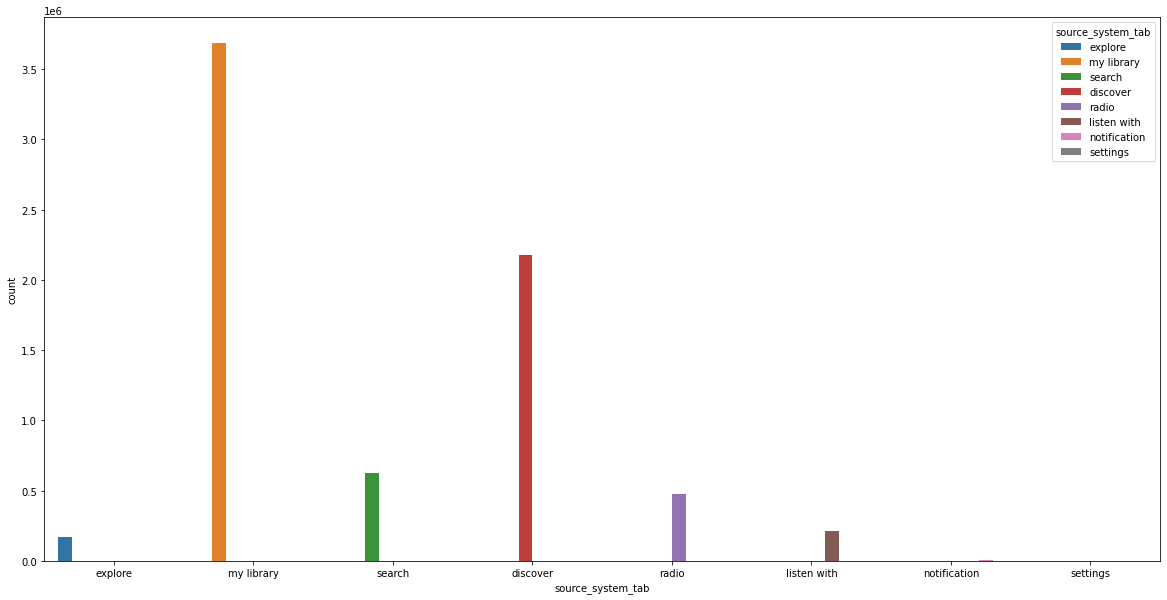

In [6]:
plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab', hue='source_system_tab', data=train)

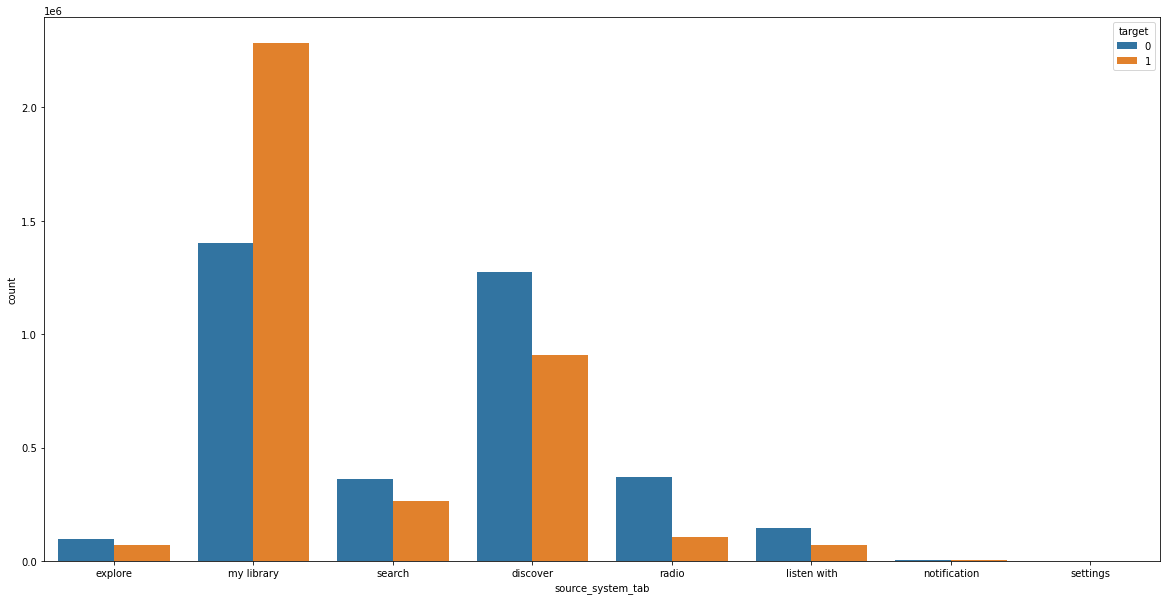

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab', hue='target', data=train)

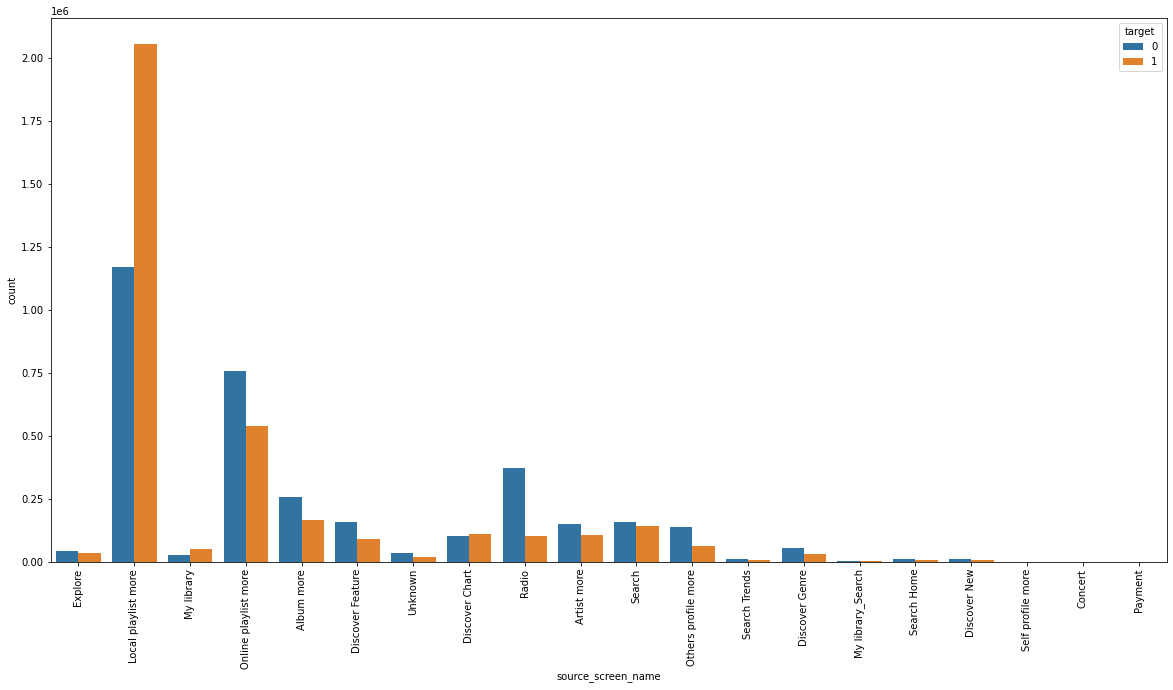

In [8]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_screen_name', hue='target',data=train)

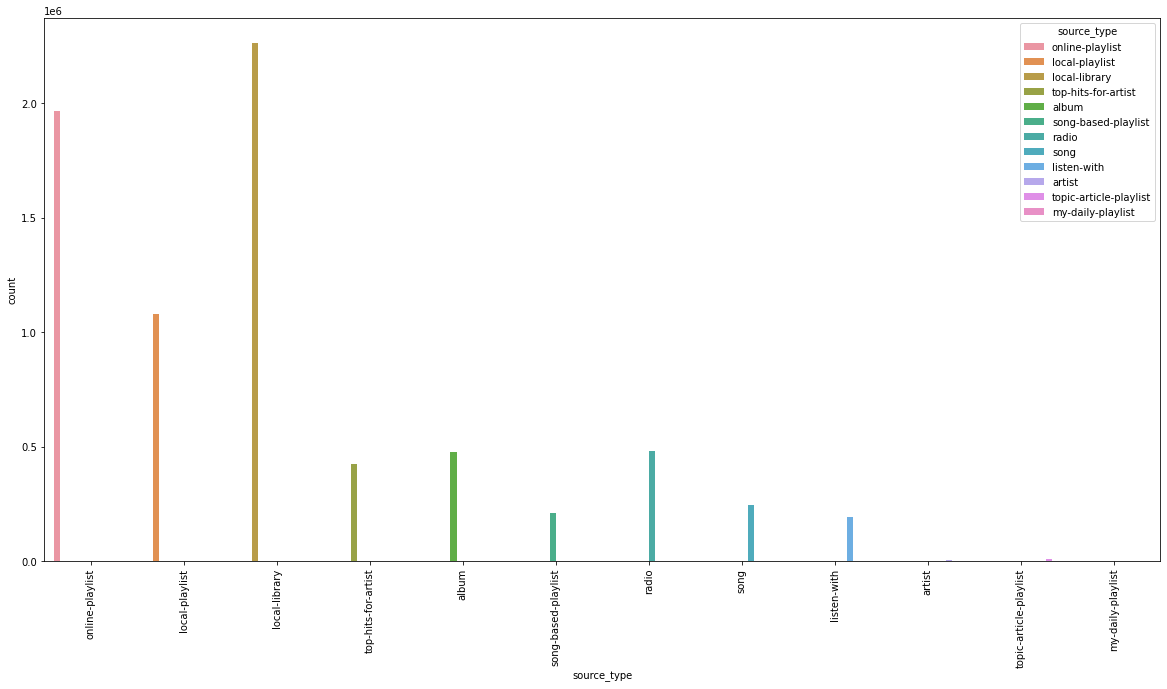

In [9]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='source_type',data=train)

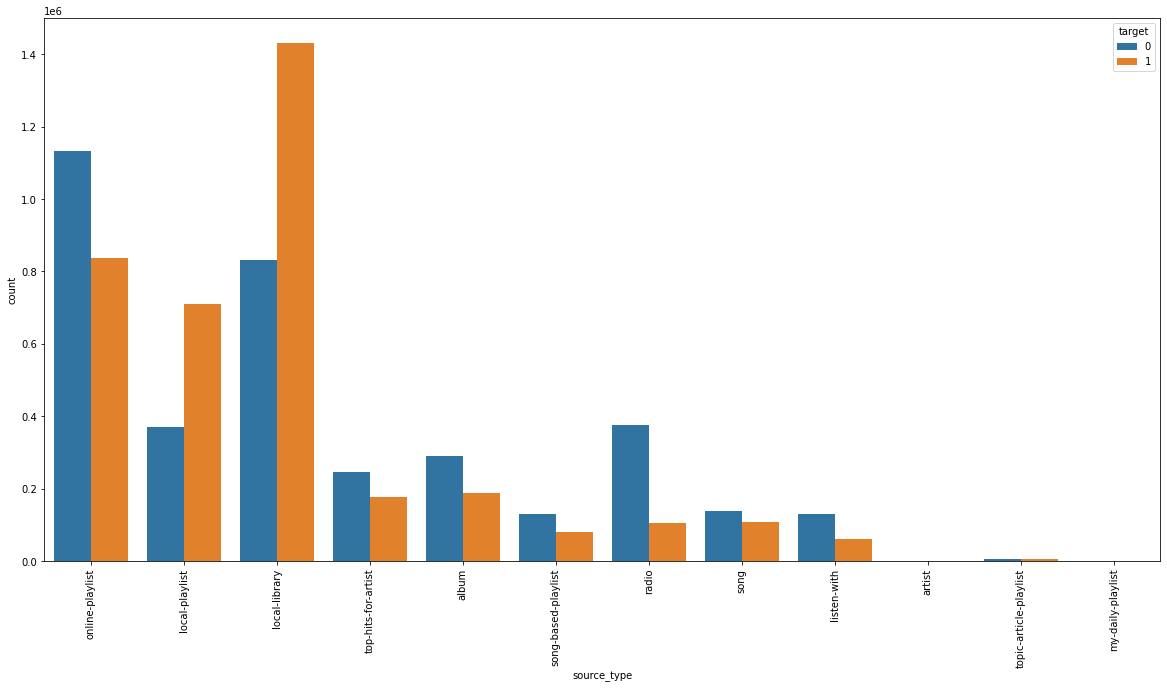

In [10]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='target',data=train)

# Data Cleaning

In [11]:
ntr = 7000
nts = 3000

names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']

test1 = pd.read_csv('/content/drive/MyDrive/Data_Science/Datasets/MusicRecommedation/train.csv',names=names,skiprows=ntr,nrows=nts)
test = test1.drop(['target'],axis=1)

ytr = np.array(test1['target'])

test_name = ['id','msno','song_id','source_system_tab','source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']

train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

members_cols = members.columns

train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')
train = train.fillna(-1)
test = test.fillna(-1)

# clean dataset and carry garbage collection operation
import gc
del members, songs; gc.collect();

cols = list(train.columns)
cols.remove('target')


for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])


100%|██████████| 17/17 [00:34<00:00,  2.02s/it]


# Build Machine Learning Model for Music Recommendation

In [12]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

# garbage collection
del train, test; gc.collect();

# Spliting Dataset into Training and Testing Dataset in ratio 85:15 respectively
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state = 12)
    
#garbage collection
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

In [14]:
# function for ML model
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [15]:
# check accuracy of the model by calling predict function
predict(LogisticRegression())

Training Score : 0.503714116449164
Accuracy on test data for the model 72.26666666666667


# Model Creation and Prediction Using LightGBM

In [16]:
# set parameters for the model
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'
params['max_bin'] = 255

# training dataset
model1 = lgb.train(params, train_set=d_train, num_boost_round=300, valid_sets=watchlist, early_stopping_rounds=10, verbose_eval=10)

Training until validation scores don't improve for 10 rounds.
[10]	training's auc: 0.711565	valid_1's auc: 0.711265
[20]	training's auc: 0.73017	valid_1's auc: 0.729067
[30]	training's auc: 0.740614	valid_1's auc: 0.738582
[40]	training's auc: 0.749658	valid_1's auc: 0.746685
[50]	training's auc: 0.75681	valid_1's auc: 0.753086
[60]	training's auc: 0.763221	valid_1's auc: 0.758808
[70]	training's auc: 0.768497	valid_1's auc: 0.763452
[80]	training's auc: 0.773244	valid_1's auc: 0.767468
[90]	training's auc: 0.777016	valid_1's auc: 0.770501
[100]	training's auc: 0.779996	valid_1's auc: 0.772756
[110]	training's auc: 0.782825	valid_1's auc: 0.774882
[120]	training's auc: 0.785143	valid_1's auc: 0.776443
[130]	training's auc: 0.78719	valid_1's auc: 0.777731
[140]	training's auc: 0.789636	valid_1's auc: 0.779523
[150]	training's auc: 0.792072	valid_1's auc: 0.781337
[160]	training's auc: 0.79413	valid_1's auc: 0.782662
[170]	training's auc: 0.796588	valid_1's auc: 0.784486
[180]	training's

In [17]:
 # Predict Model
p_test = model1.predict(X_test)
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
# Print Model Accuracy
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 82.433333%


<b>Conclusion:<br>
As per the accuracy LGBM (Light Gradient Boosting Model) is better than classic logistic regression model for this dataset. Accuracy of LGBM can be increased by reducing overfitting (ie. passing parameters corresponding the certain dataset). </b>